# Model Output Notebook
<img style="float:right;" src="https://id.dewberry.com/clients/Templates/DewberryLogo_RGB.png" width=150px>

### ADCIRC-SWAN Ouput
#### - Steps to follow:
  1. Import Libraries & Assign Paths
  2. Assign Tasks
  3. Save Report

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
from adcirc import adcirc
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import HTML
from importlib import reload
import noaa_lib ; reload(noaa_lib)
from noaa_lib import *

In [2]:
root_dir = r'P:\Temp\tmiesse\projects\north_carolina\tidal_test_01_18'
f61 = os.path.join(root_dir,'fort.61.nc')
f62 = os.path.join(root_dir,'fort.62.nc')
f63 = os.path.join(root_dir,'fort.63.nc')
f64 = os.path.join(root_dir,'fort.64.nc')

In [3]:
file = nc4.Dataset(f61)
node = [629653,110215,79973] # Beaufort, Wrightsville, Hatteras
x = file.variables['x'][:]
y = file.variables['y'][:]

In [4]:
duke = file.variables['zeta'][:,23]
wright=file.variables['zeta'][:,21]

In [5]:
stations = tide_gauges()
start,end = 'begin_date=20180101','end_date=20180131'
obs_duke  = pd.read_csv(tide_data(start,end,stations[1]['Beaufort']))
obs_wright= pd.read_csv(tide_data(start,end,stations[2]['Wrightsville']))
obs_duke.name,obs_wright.name = 'Obs. Beaufort','Obs. Wrightsville'

In [6]:
duke2 = pd.DataFrame(duke)
date = pd.date_range(start ='20180101',periods=8928, freq='5min')
duke2.insert(0,'Date Time',date)
duke2.name = 'Beaufort'
dukef = duke2.rename(columns={0:' Water Level'})

In [7]:
wright2=pd.DataFrame(wright)
wright2.insert(0,'Date Time',date)
wright2.name = 'Wrightsville'
wrightf = wright2.rename(columns={0:' Water Level'})

In [9]:
datasets = [obs_duke,obs_wright,wrightf,dukef]

In [13]:
name = ['Obs. Beaufort','Obs. Wrightsville','Wrightsville','Beaufort']

In [14]:
data = list()
i=0
for dataset in datasets:
    date = dataset.loc[:,'Date Time']
    water_level = dataset.loc[:,' Water Level']
    c_list = ['rgb(51, 204, 51)','rgb(0, 255, 204)',
                  'rgb(0, 204, 255)','rgb(102, 255, 255)',
                  'rgb(0, 102, 153)','rgb(0, 0, 255)',
                  'rgb(51, 51, 255)','rgb(102, 0, 255)',
                  'rgb(153, 153, 255)','rgb(204, 0, 255)',
                  'rgb(255, 51, 204)','rgb(204, 0, 0)',
                  'rgb(255, 153, 0)','rgb(204, 255, 51)',
                  'rgb(0, 153, 0)']
    for x in range(1):
            y=random.randint(1,14)
            color = c_list[y]
    trace = go.Scatter(
            x = date,
            y = water_level,
            name = name[i],
                line = dict(
                color = color))
    i+=1
    data.append(trace)
layout = go.Layout(dict(title = 'Tidal Test'),
          xaxis = dict(title = 'Time'),
          yaxis = dict(title = 'Water level (m) at MSL'),                     
          legend= dict(orientation = "h"),
          font = dict(color = 'rgb(255,255,255)'),
          paper_bgcolor = 'rgb(0,0,0)',
          plot_bgcolor = 'rgb(0,0,0)')

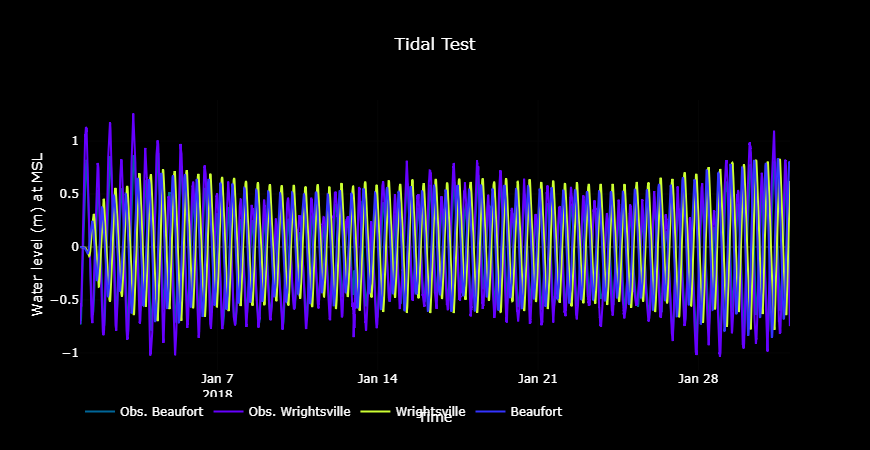

In [15]:
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)